<a href="https://colab.research.google.com/github/pham156/pytorch-learning/blob/main/PyTorch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, io
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [112]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True) # mkdir: create folder
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f: # with open(): open the file
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # request.get(): get the link
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref: # unzip data
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [113]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [114]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

(-0.5, 511.5, 383.5, -0.5)

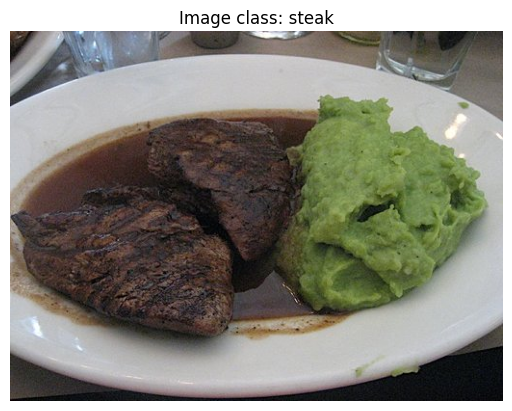

In [115]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(train_dir.glob("*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
image = Image.open(random_image_path)
plt.imshow(image)
plt.title(f"Image class: {image_class}")
plt.axis(False)

In [116]:
# transforming data

In [117]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)), # resize to 64x64
    transforms.RandomHorizontalFlip(p=0.5), # random flip
    transforms.ToTensor() # transform to tensor
])

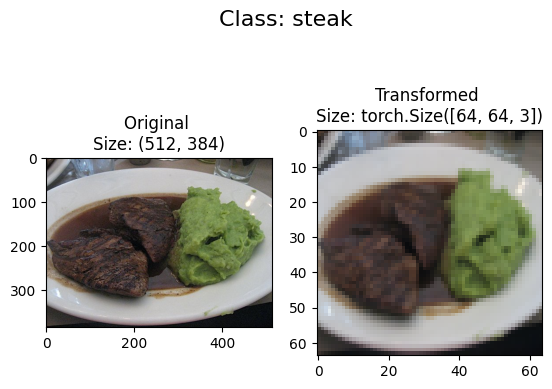

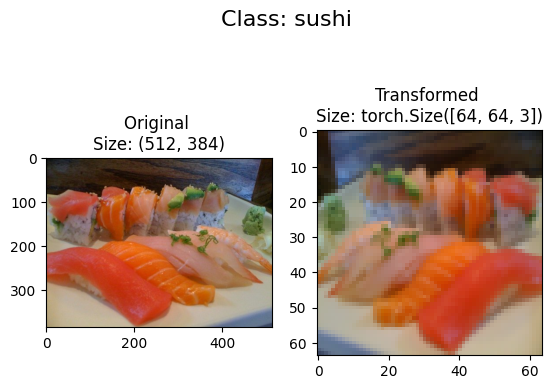

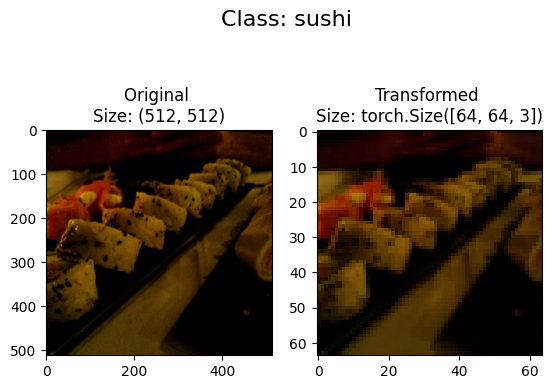

In [118]:
# visualize data
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    # open n image paths from image_paths, transform them with transform, plot them side by side
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            transformed_image = transform(f).permute(1, 2, 0)
            transformed_image_shape = transformed_image.shape
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_path_list, data_transform, n=3)

In [119]:
# Load image data using ImageFolder
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

In [120]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [121]:
class_dict = train_data.class_to_idx # class to dict
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [122]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Text(0.5, 1.0, 'pizza')

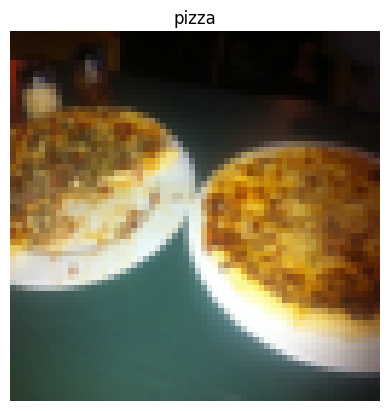

In [123]:
img.permute(1, 2, 0)
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)
plt.title(class_names[label])

In [124]:
# Option 1: turn into DataLoader -> iterable dataset
# batch_size: divide to batches
# num_workers: # subprocesses to use for data loading
# shuffle
train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, num_workers=1, shuffle=False)

In [125]:
# Option 2: custom dataset
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [126]:
target_directory = train_dir
class_names_found = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
class_names_found

['pizza', 'steak', 'sushi']

In [127]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [128]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transforms=None) -> None:
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        self.transforms = transforms
        self.classes, self.class_to_idx = find_classes(targ_dir)
    # open image
    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    # return size
    def __len__(self) -> int:
        return len(self.paths)
    # get image
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transforms:
            return self.transforms(image), class_idx
        else:
            return image, class_idx

In [129]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [130]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transforms=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transforms=test_transform)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e787e350880>,
 <__main__.ImageFolderCustom at 0x7e787e3518a0>)

In [131]:
# display random image
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
    if seed:
        random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjusted = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjusted)
        if classes:
            plt.title(classes[targ_label])
        else:
            plt.title(str(targ_label))


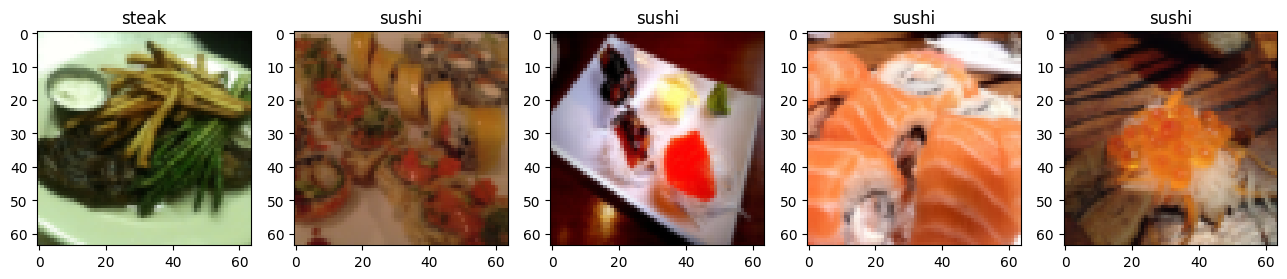

In [132]:
display_random_image(train_data_custom, n=5, classes=class_names)


In [133]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, num_workers=1, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=1, num_workers=1, shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e787c751ab0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e787c7537f0>)

In [134]:
img_custom, label_custom = train_data_custom[0][0], train_data_custom[0][1]
img_custom, label_custom

(tensor([[[0.9882, 0.9882, 0.9882,  ..., 0.2314, 0.2627, 0.2902],
          [0.9882, 0.9882, 0.9922,  ..., 0.2275, 0.2980, 0.2471],
          [0.9882, 0.9882, 0.9922,  ..., 0.2235, 0.3098, 0.2471],
          ...,
          [0.1137, 0.1176, 0.1176,  ..., 0.1765, 0.1843, 0.1804],
          [0.1294, 0.1412, 0.1255,  ..., 0.1412, 0.1294, 0.1373],
          [0.1451, 0.1490, 0.1255,  ..., 0.1255, 0.1255, 0.1216]],
 
         [[0.9490, 0.9569, 0.9529,  ..., 0.1529, 0.1686, 0.1961],
          [0.9451, 0.9608, 0.9804,  ..., 0.1529, 0.2078, 0.1882],
          [0.9333, 0.9569, 0.9882,  ..., 0.1725, 0.2431, 0.1686],
          ...,
          [0.0431, 0.0392, 0.0392,  ..., 0.1412, 0.1451, 0.1294],
          [0.0431, 0.0471, 0.0431,  ..., 0.1020, 0.0980, 0.1020],
          [0.0510, 0.0510, 0.0431,  ..., 0.0627, 0.0706, 0.0745]],
 
         [[0.8039, 0.7882, 0.7843,  ..., 0.2078, 0.2353, 0.2510],
          [0.7922, 0.8431, 0.8706,  ..., 0.1765, 0.2196, 0.2157],
          [0.7765, 0.8431, 0.9216,  ...,

In [135]:
# data augmentation: the process of altering your data in such a way that you artificially increase the diversity of your training set.
# TrivialAugmentWide: applies a series of random transformations to your images, like color changes, rotations, and flips, to create variations that can help your model generalize better.

In [136]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # data augmentation part # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

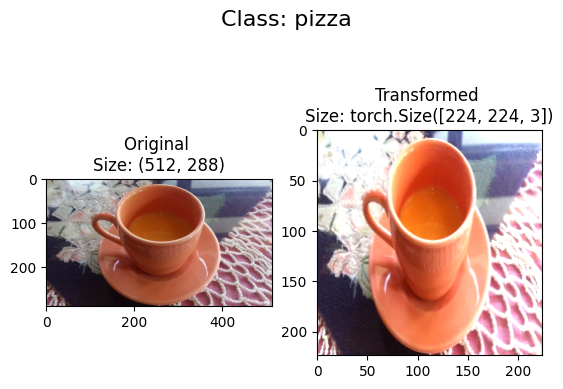

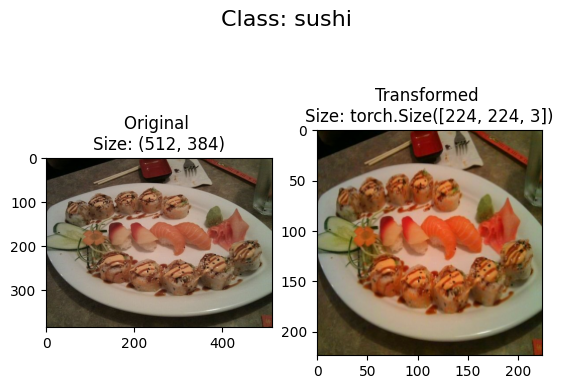

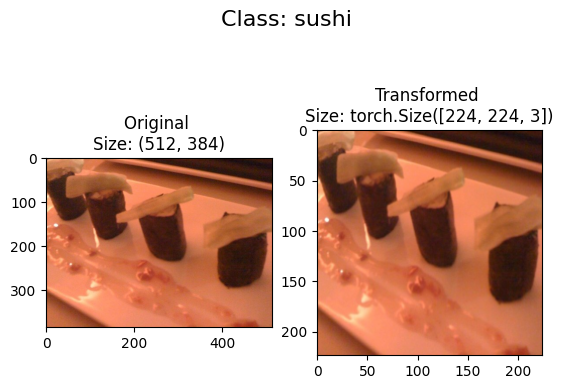

In [137]:
image_path_list = list(train_dir.glob("*/*.jpg"))
plot_transformed_images(image_path_list, train_transforms, n=3, seed=None)

In [138]:
# TinyVGG without augmentation

In [139]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [140]:
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform, target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform, target_transform=None)
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [141]:
train_dataloader_simple = DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7e787c47fb80>,
 <torch.utils.data.dataloader.DataLoader at 0x7e787c47e740>)

In [142]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [143]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [144]:
img_batch, label_batch = next(iter(train_dataloader_simple))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
img_single, label_single

(tensor([[[[0.9882, 0.9882, 0.9882,  ..., 0.2314, 0.2627, 0.2902],
           [0.9882, 0.9882, 0.9922,  ..., 0.2275, 0.2980, 0.2471],
           [0.9882, 0.9882, 0.9922,  ..., 0.2235, 0.3098, 0.2471],
           ...,
           [0.1137, 0.1176, 0.1176,  ..., 0.1765, 0.1843, 0.1804],
           [0.1294, 0.1412, 0.1255,  ..., 0.1412, 0.1294, 0.1373],
           [0.1451, 0.1490, 0.1255,  ..., 0.1255, 0.1255, 0.1216]],
 
          [[0.9490, 0.9569, 0.9529,  ..., 0.1529, 0.1686, 0.1961],
           [0.9451, 0.9608, 0.9804,  ..., 0.1529, 0.2078, 0.1882],
           [0.9333, 0.9569, 0.9882,  ..., 0.1725, 0.2431, 0.1686],
           ...,
           [0.0431, 0.0392, 0.0392,  ..., 0.1412, 0.1451, 0.1294],
           [0.0431, 0.0471, 0.0431,  ..., 0.1020, 0.0980, 0.1020],
           [0.0510, 0.0510, 0.0431,  ..., 0.0627, 0.0706, 0.0745]],
 
          [[0.8039, 0.7882, 0.7843,  ..., 0.2078, 0.2353, 0.2510],
           [0.7922, 0.8431, 0.8706,  ..., 0.1765, 0.2196, 0.2157],
           [0.7765, 0.84

In [145]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
pred

tensor([[0.0578, 0.0634, 0.0351]])

In [146]:
# torchinfo: shape of the model
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [147]:
def train_step(model: torch.nn.Module, dataLoader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0,0
    for batch, (X,y) in enumerate(dataLoader):
        X,y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss /= len(dataLoader)
    train_acc /= len(dataLoader)
    return train_loss, train_acc

In [148]:
def test_step(model: torch.nn.Module, dataLoader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataLoader):
            X,y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
        test_loss /= len(dataLoader)
        test_acc /= len(dataLoader)
    return test_loss, test_acc

In [149]:
# combine train_step and test_step
from tqdm.auto import tqdm
def train(model: torch.nn.Module, train_dataLoader: torch.utils.data.DataLoader, test_dataLoader: torch.utils.data.DataLoader, optimizer: torch.optim.Optimizer, loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), epochs: int = 5):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataLoader=train_dataLoader, loss_fn=loss_fn, optimizer=optimizer)
        test_loss, test_acc = test_step(model=model, dataLoader=test_dataLoader, loss_fn=loss_fn)
        print(f"Epoch: {epoch+1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss) # deal with different type of loss
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
    return results


In [150]:
torch.manual_seed(42)
NUM_EPOCHS = 5
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_simple.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0, train_dataLoader=train_dataloader_simple, test_dataLoader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 1.1078 | Train acc: 0.2578 | Test loss: 1.1362 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0846 | Train acc: 0.4258 | Test loss: 1.1622 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.1153 | Train acc: 0.2930 | Test loss: 1.1695 | Test acc: 0.1979
Epoch: 4 | Train loss: 1.0990 | Train acc: 0.2891 | Test loss: 1.1343 | Test acc: 0.1979
Epoch: 5 | Train loss: 1.0990 | Train acc: 0.2930 | Test loss: 1.1434 | Test acc: 0.1979
Total training time: 12.640 seconds


In [151]:
def plot_loss_curves(results: Dict[str, List[float]]):

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

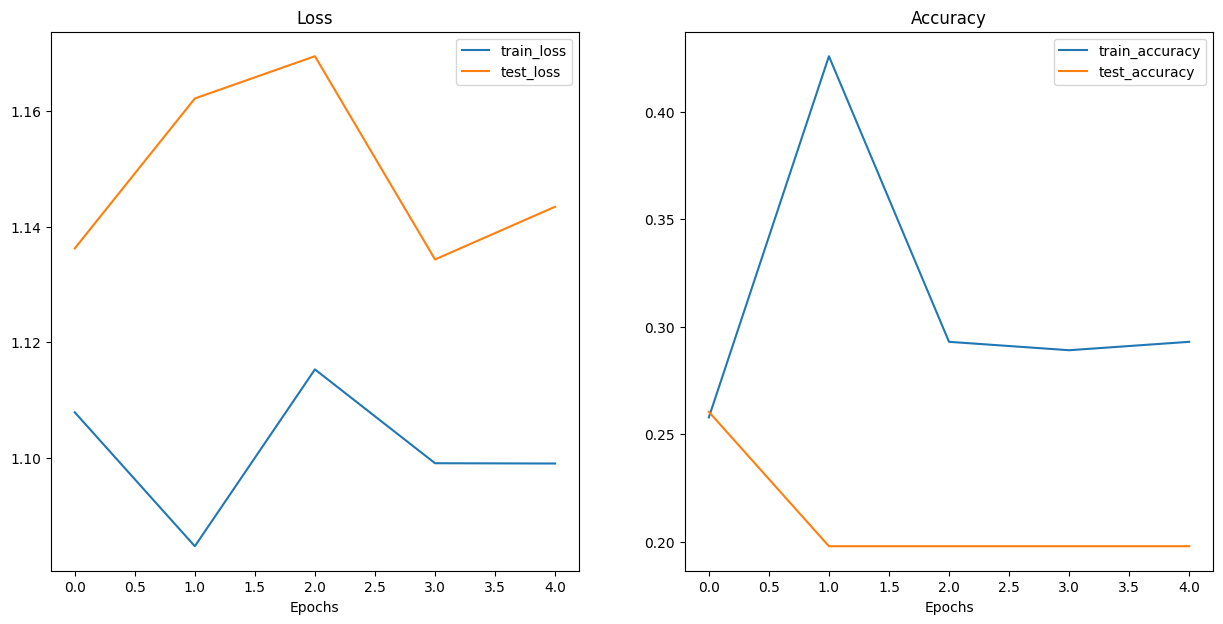

In [152]:
plot_loss_curves(model_0_results)

In [153]:
# Underfitting: train loss too high
# Overfitting: test loss is much higher than train loss

In [ ]:
# deal with overfitting:
# regulization
# get more data
# simplify model
# use data augmentation
# use transfer learning
# use dropout
# use learning rate decay
# use early stopping

In [ ]:
# deal with Underfitting:
# add more layers/units to model
# tweak the learning rate
# use transfer learning
# train longer
# use less regulization

In [ ]:
# TinyVGG with Data Augmentation
# augment training data

In [155]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [156]:
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform)

In [157]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7e787c751180>,
 <torch.utils.data.dataloader.DataLoader at 0x7e787c7513c0>)

In [158]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [160]:
torch.manual_seed(42)
NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataLoader=train_dataloader_augmented,
                        test_dataLoader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 1.1076 | Train acc: 0.2500 | Test loss: 1.1062 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0791 | Train acc: 0.4258 | Test loss: 1.1387 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.0810 | Train acc: 0.4258 | Test loss: 1.1696 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.1292 | Train acc: 0.3047 | Test loss: 1.1625 | Test acc: 0.2604
Epoch: 5 | Train loss: 1.0899 | Train acc: 0.4258 | Test loss: 1.1482 | Test acc: 0.2604
Total training time: 11.814 seconds


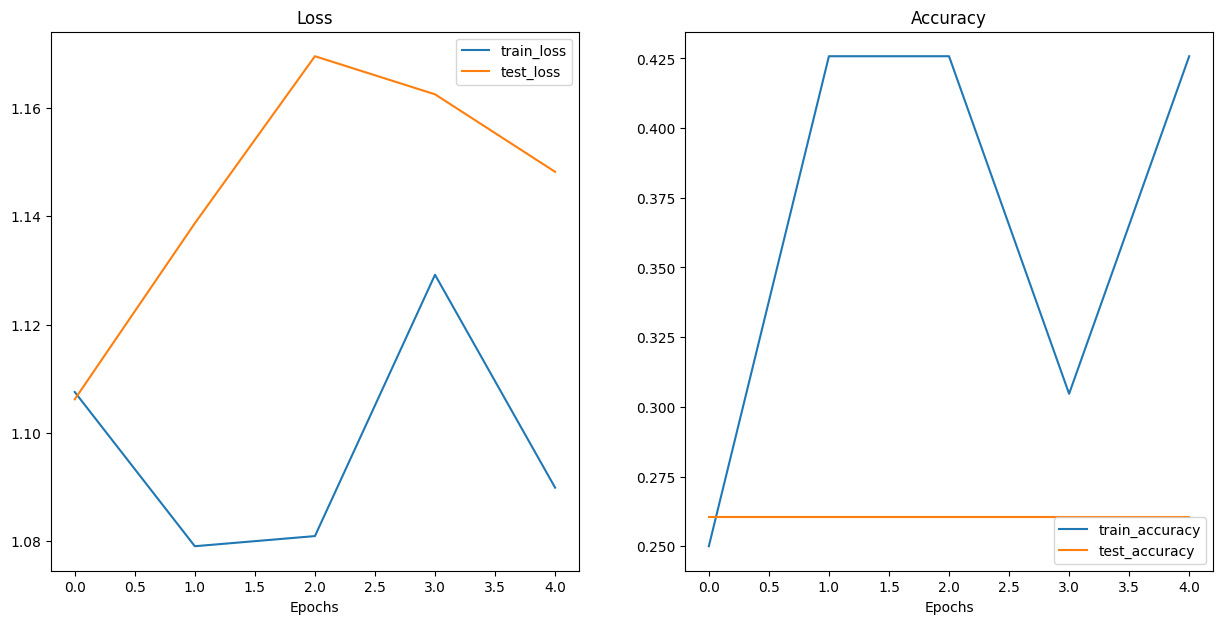

In [161]:
plot_loss_curves(model_1_results)

In [162]:
# Compare
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084645,0.425781,1.162171,0.197917
2,1.115261,0.292969,1.169489,0.197917
3,1.099015,0.289062,1.134302,0.197917
4,1.098965,0.292969,1.143424,0.197917


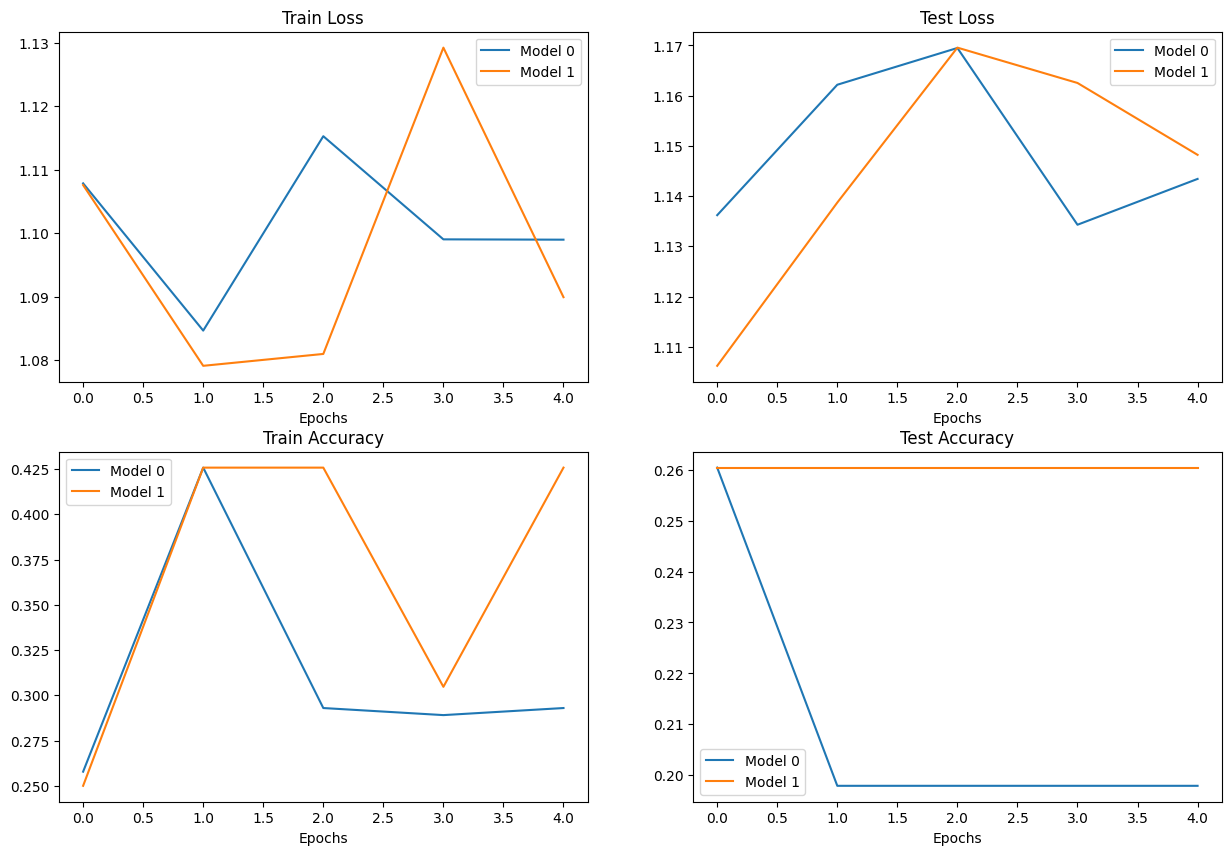

In [163]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Make prediction

In [164]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [174]:
# Load in custom image and convert the tensor values to float32
custom_image = io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [175]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [176]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1188,  0.0339, -0.1486]])
Prediction probabilities: tensor([[0.3726, 0.3422, 0.2852]])
Prediction label: tensor([0])


In [177]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'